### Importação dos dados



In [7]:
import pandas as pd

# URLs das lojas
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo os CSVs em uma lista de DataFrames
lojas_list = [pd.read_csv(url) for url in urls]

# Convertendo a coluna 'Data da Compra' para datetime
for loja in lojas_list:
    loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], dayfirst=True)

# Criando um dicionário com nomes das lojas
lojas_dict = {
    f"Loja {i+1}": lojas_list[i] for i in range(len(lojas_list))
}

# Conferindo tipos e primeiras linhas da primeira loja
print(lojas_dict["Loja 1"].dtypes)
print(lojas_dict["Loja 1"].head())

Produto                           object
Categoria do Produto              object
Preço                            float64
Frete                            float64
Data da Compra            datetime64[ns]
Vendedor                          object
Local da compra                   object
Avaliação da compra                int64
Tipo de pagamento                 object
Quantidade de parcelas             int64
lat                              float64
lon                              float64
dtype: object
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     

#1. Análise do Faturamento Total por Loja


**🔍O que é:** Faturamento se trata do Preço × Quantidade de produtos vendidos pela loja.

---

In [15]:
# Dicionário para armazenar o faturamento total de cada loja
faturamento_por_loja = {}

for nome, df in lojas_dict.items():
    faturamento_total = df['Preço'].sum()
    faturamento_por_loja[nome] = faturamento_total

# Exibindo o faturamento total formatado por loja
print("Faturamento total por loja:")
for loja, total in faturamento_por_loja.items():
    print(f"{loja}: R$ {total:,.2f}")

Faturamento total por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


### 1.1  Gráfico de Barras: Faturamento por Loja

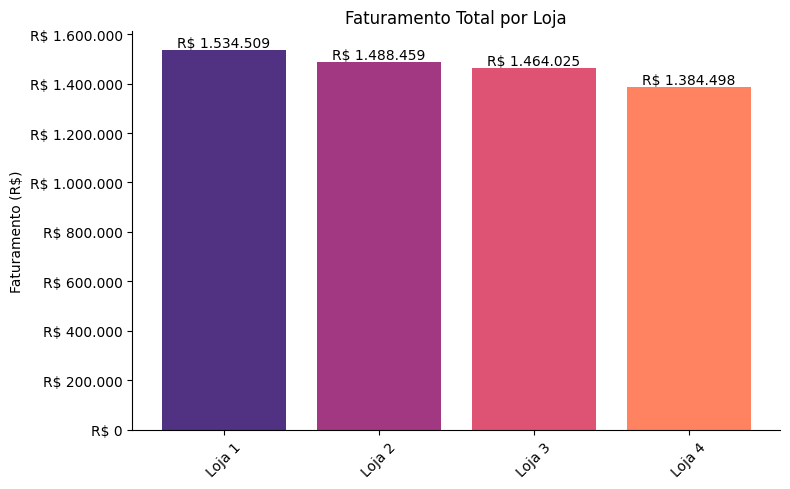

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Separando nomes e valores para o gráfico
nomes_lojas = list(faturamento_por_loja.keys())
valores_faturamento = list(faturamento_por_loja.values())
cores = ['#503182', '#a33882', '#de5373', '#ff8360']

# Criando o gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(nomes_lojas, valores_faturamento, color=cores)

# Adicionando valores no topo de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2, altura,
        f'R$ {altura:,.0f}'.replace(",", "X").replace(".", ",").replace("X", "."),
        ha='center', va='bottom', fontsize=10
    )

# Formatando o eixo Y com separador brasileiro
ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", "."))
)

plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()

plt.show()



## 1.2. Média do Preço por Produtos


🔍 **O que é:**
Soma dos preços dividida pelo número de produtos vendidos.

---

✔️ **Utilidade:** Mostra se uma loja fatura mais por vender itens mais caros ou apenas por vender em maior quantidade.

📊 **Relação com faturamento:** Ajuda a entender se o alto faturamento vem do preço médio ou volume de vendas.

In [16]:
preco_medio_categoria = df.groupby('Categoria do Produto')['Preço'].mean().sort_values()

categorias = preco_medio_categoria.index
valores = preco_medio_categoria.values

## 1.2.1 Gráfico de Barras Horizontal: Média do Preço por Produto

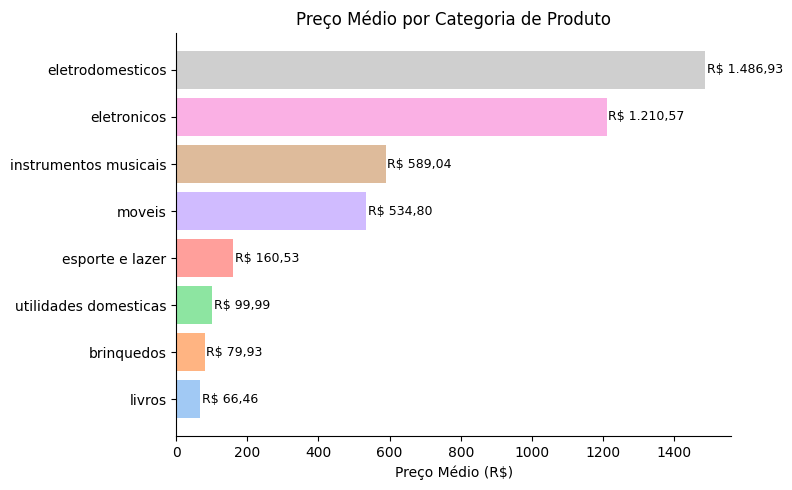

In [ ]:
plt.figure(figsize=(8, 5))
cores = sns.color_palette("pastel", len(categorias))  # cores suaves

barras = plt.barh(categorias, valores, color=cores)

# Adicionando valores ao final de cada barra
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 5, barra.get_y() + barra.get_height()/2,
             f'R$ {largura:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."),
             va='center', fontsize=9)

plt.title('Preço Médio por Categoria de Produto')
plt.xlabel('Preço Médio (R$)')
plt.tight_layout()

# Removendo bordas superior e direita
sns.despine()

plt.show()

## 1.3. Quantidade de Vendas por Loja

🔍 O que é: Número total de vendas por loja.

---

✔️ Utilidade: Mostra o volume de vendas que contribui para o faturamento.

📊 Relação com faturamento: Loja que vende muito pode ter alto faturamento mesmo com preços baixos.

In [25]:
# Cálculo da quantidade de vendas por loja
qtd_vendas_por_loja = {}
for nome, df in lojas_dict.items():
    qtd_vendas_por_loja[nome] = len(df)   # número de linhas do DataFrame

# Exibindo os resultados
print("Quantidade de vendas por loja:")
for loja, qtd in qtd_vendas_por_loja.items():
    print(f"{loja}: {qtd}")

Quantidade de vendas por loja:
Loja 1: 2359
Loja 2: 2359
Loja 3: 2359
Loja 4: 2358


## 1.3.1 Gráfico de Barras: Quantidade de Vendas por Loja

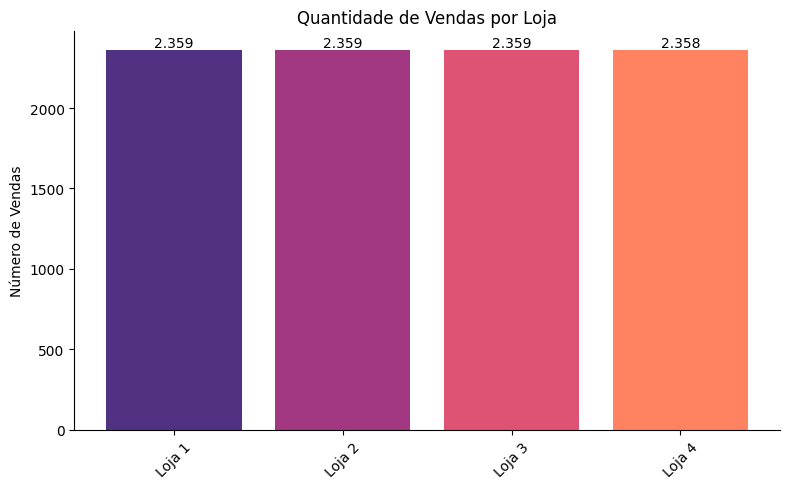

In [26]:
nomes_lojas = list(qtd_vendas_por_loja.keys())
valores_vendas = list(qtd_vendas_por_loja.values())
cores = ['#503182', '#a33882', '#de5373', '#ff8360']

plt.figure(figsize=(8, 5))
barras = plt.bar(nomes_lojas, valores_vendas, color=cores)

# Adicionando valores no topo das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2, altura,
        f'{altura:,}'.replace(",", "."),
        ha='center', va='bottom', fontsize=10
    )

plt.title('Quantidade de Vendas por Loja')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()

plt.show()

## 1.4. Faturamento por Categoria de Produto:



🔍 O que é: Soma do faturamento em R$ por tipo de produto (quanto cada categoria rendeu).

---



✔️ Utilidade: Identifica quais categorias mais impactam o faturamento.

📊 Relação com faturamento: Permite traçar estratégias por linha de produto.

In [37]:
df_faturamento = pd.DataFrame()

for nome, df in lojas_dict.items():
    agrupado = df.groupby("Categoria do Produto")["Preço"].sum().reset_index()
    agrupado["Loja"] = nome
    df_faturamento = pd.concat([df_faturamento, agrupado])

## 1.4.1 Gráfico de Colunas: Faturamento por Categoria de Produto:

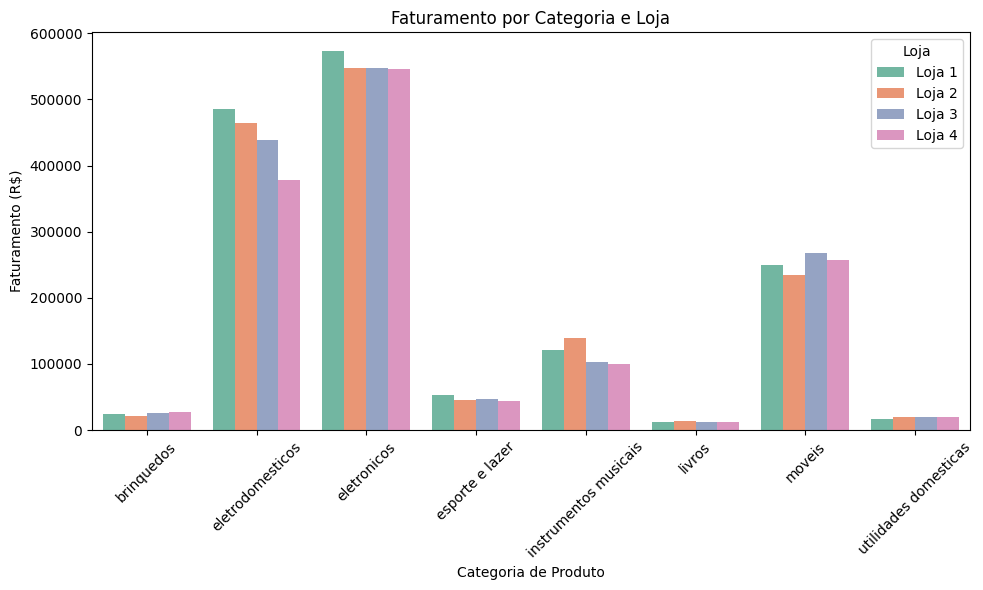

In [38]:
# Gráfico de colunas (barplot)
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_faturamento,
    x="Categoria do Produto",
    y="Preço",
    hue="Loja",   # cada loja em uma cor
    errorbar=None,
    palette="Set2"
)

plt.title("Faturamento por Categoria e Loja")
plt.xlabel("Categoria de Produto")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Vendas Por Categoria

🔍 **O que é:** Soma do faturamento em R$ por tipo de produto (quanto cada categoria rendeu).

---
✔️ **Utilidade:** Identifica quais categorias mais impactam o faturamento, ajudando a visualizar os segmentos mais lucrativos.

📊 **Relação com faturamento:** Permite traçar estratégias por linha de produto, direcionando esforços de marketing, promoções e gestão de estoque para os segmentos mais relevantes.


In [30]:
faturamento_por_categoria = df.groupby("Categoria do Produto")["Preço"].sum().reset_index()
faturamento_por_categoria.rename(columns={"Preço": "Faturamento"}, inplace=True)

print(faturamento_por_categoria)

    Categoria do Produto  Faturamento
0             brinquedos     27015.67
1       eletrodomesticos    377680.65
2            eletronicos    545966.86
3        esporte e lazer     44465.65
4  instrumentos musicais    100136.50
5                 livros     12427.77
6                 moveis    256705.65
7  utilidades domesticas     20098.83


## 2.1 Gráfico de Heatmap: Vendas por Categoria

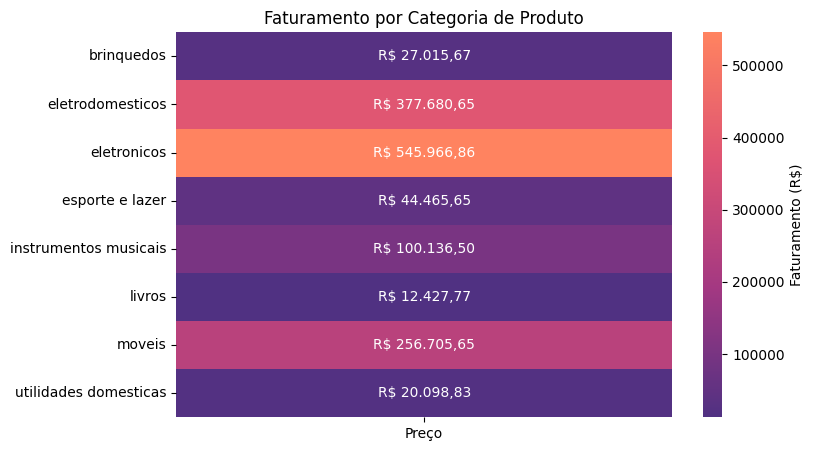

In [36]:
from matplotlib.colors import LinearSegmentedColormap

# Faturamento por categoria
faturamento_por_categoria = df.groupby("Categoria do Produto")["Preço"].sum().reset_index()

#Cores personalizadas
cores = ['#503182', '#a33882', '#de5373', '#ff8360']
cmap_personalizado = LinearSegmentedColormap.from_list("meu_cmap", cores)

# Transformar em tabela para heatmap
tabela = faturamento_por_categoria.pivot_table(
    index="Categoria do Produto",
    values="Preço"
)

# Formatar os valores manualmente
annot_labels = tabela['Preço'].apply(lambda x: f'R$ {x:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."))

plt.figure(figsize=(8,5))
sns.heatmap(
    tabela,
    annot=annot_labels.values.reshape(-1,1),  # reshape para 2D
    fmt="",
    cmap=cmap_personalizado,
    cbar_kws={'label': 'Faturamento (R$)'},
    annot_kws={"fontsize": 10}
)

plt.title("Faturamento por Categoria de Produto")
plt.ylabel("")
plt.xlabel("")
plt.show()

# 3. Média de Avaliação das Lojas

🔍 O que é: Média das avaliações recebidas nas compras de cada loja, variando de 1 a 5.

---

✔️ Utilidade: Permite identificar quais lojas entregam melhor experiência ao cliente e quais podem precisar de melhorias no atendimento, produto ou serviço.

📊 Relação com vendas: Ajuda a correlacionar satisfação do cliente com desempenho de vendas, permitindo ajustes em marketing, atendimento e estratégias de fidelização para aumentar receita e retenção.

In [39]:
df_lojas = pd.concat(
    [lojas_dict[loja].assign(Loja=loja) for loja in lojas_dict],
    ignore_index=True
)

# Calcular a média de avaliação por loja
medias_avaliacao = df_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()

## 3.1. Line Plot: Média de Avaliação das Lojas

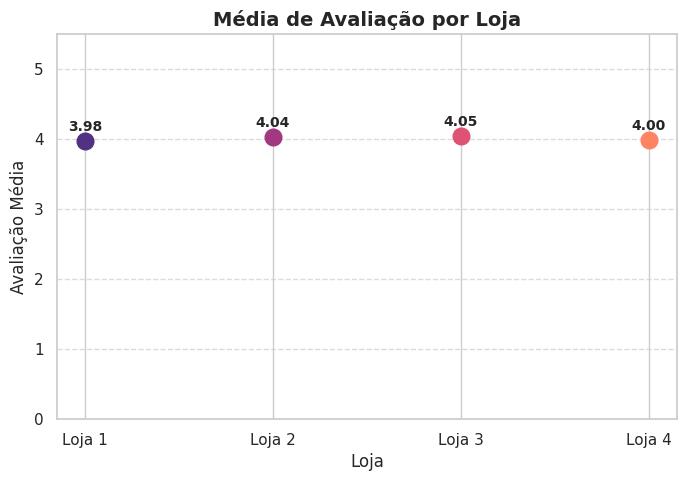

In [9]:
df_lojas = pd.concat(
    [lojas_dict[loja].assign(Loja=loja) for loja in lojas_dict],
    ignore_index=True
)

# Calcular média de avaliação por loja
medias_avaliacao = df_lojas.groupby('Loja')['Avaliação da compra'].mean()

# Definir cores diferentes para cada ponto
cores = ['#503182', '#a33882', '#de5373', '#ff8360']

plt.figure(figsize=(8,5))
for i, loja in enumerate(medias_avaliacao.index):
    plt.plot(loja, medias_avaliacao[loja], marker='o', markersize=12, color=cores[i])
    plt.text(loja, medias_avaliacao[loja]+0.1, f'{medias_avaliacao[loja]:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)
plt.ylim(0,5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Produtos Mais e Menos Vendidos

🔍**O que é:** Quantidade total de vendas de cada produto em um período específico, mostrando quais produtos foram mais populares e quais venderam menos.

---

✔️ **Utilidade:** Permite identificar os produtos que estão performando melhor no mercado e aqueles que precisam de atenção, reposição ou promoção.

📊 **Relação com vendas:** Ajuda a direcionar estratégias de estoque, marketing e promoções, focando nos produtos que trazem mais receita e ajustando ou descontinuando os que vendem menos.

In [10]:
#DataFrame único
df_lojas = pd.concat(
    [lojas_dict[loja].assign(Loja=loja) for loja in lojas_dict],
    ignore_index=True
)

vendas_produto = df_lojas['Produto'].value_counts()

# Produtos mais vendidos
mais_vendidos = vendas_produto.head(5)
print("Produtos Mais Vendidos:")
print(mais_vendidos)

# Produtos menos vendidos
menos_vendidos = vendas_produto.tail(5)
print("\nProdutos Menos Vendidos:")
print(menos_vendidos)

Produtos Mais Vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

Produtos Menos Vendidos:
Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


## 4.1. Gráfico de Barras Horizontal: Produtos Mais e Menos Vendidos

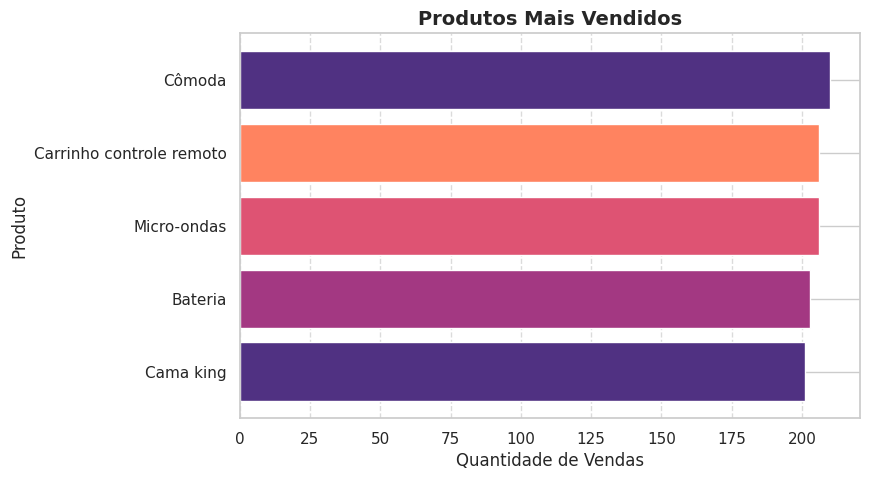

In [11]:
# Contar vendas por produto
vendas_produto = df_lojas['Produto'].value_counts()

# Selecionar os 5 produtos mais vendidos
mais_vendidos = vendas_produto.head(5)

# Definir cores personalizadas (repetindo se houver menos cores que produtos)
cores = ['#503182', '#a33882', '#de5373', '#ff8360']
cores_plot = [cores[i % len(cores)] for i in range(len(mais_vendidos))]

# Plot
plt.figure(figsize=(8,5))
plt.barh(mais_vendidos.index[::-1], mais_vendidos.values[::-1], color=cores_plot)
plt.title('Produtos Mais Vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Frete Médio por Loja


🔍 **O que é:** Valor médio do frete pago pelos clientes em cada loja durante o período analisado.

---

✔️ **Utilidade:** Permite entender o custo adicional que os clientes estão pagando e comparar eficiência logística entre lojas.

📊 **Relação com vendas:** Ajuda a identificar oportunidades de otimização de frete, definir políticas de entrega gratuitas ou promocionais e ajustar preços para manter competitividade sem impactar negativamente a receita.

In [12]:
frete_medio = df_lojas.groupby('Loja')['Frete'].mean()

print("Frete Médio por Loja:")
print(frete_medio)

Frete Médio por Loja:
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


## 5.1. Line Plot Categórico: Frete Médio por Loja

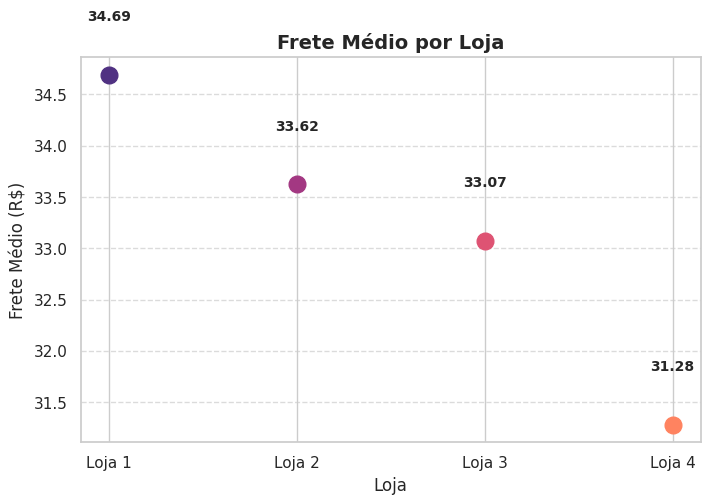

In [13]:
# Cores personalizadas
cores = ['#503182', '#a33882', '#de5373', '#ff8360']

plt.figure(figsize=(8,5))
for i, loja in enumerate(frete_medio.index):
    plt.plot(loja, frete_medio[loja], marker='o', markersize=12, color=cores[i])
    plt.text(loja, frete_medio[loja]+0.5, f'{frete_medio[loja]:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Frete Médio por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Relatório Final das Lojas.
---

**Objetivo:**

O objetivo desta análise é identificar qual loja é a melhor candidata para venda com base em fatores como faturamento, vendas por categoria e produto, média de avaliações de clientes e frete médio. A análise considera os dados de quatro lojas, comparando seus pontos fortes e fracos, para fornecer uma recomendação clara e objetiva.

---

**Desenvolvimento:**

1. **Faturamento Total**

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58

*Observação: A Loja 1 apresenta o maior faturamento total, indicando maior receita gerada.*

---

2. **Quantidade de Vendas e Produtos Mais Vendidos**

Todas as lojas têm praticamente o mesmo número de vendas (~2359), então o volume de transações é similar.

Produtos mais vendidos: Cômoda, Carrinho Controle Remoto, Micro-ondas, Bateria e Cama King.

*Observação: O portfólio de produtos mais vendidos é diversificado, mas o faturamento não depende apenas da quantidade de vendas, e sim do valor médio dos produtos.*

---

3. **Vendas por Categoria**

As categorias que mais geram faturamento são:

Eletrônicos: R$ 545.966,86

Eletrodomésticos: R$ 377.680,65

Móveis: R$ 256.705,65

*Observação: Lojas que vendem mais desses segmentos tendem a gerar mais receita.*

---
4. Média de Avaliações por Loja
**texto em negrito**
Loja 3: 4,05

Loja 2: 4,04

Loja 4: 4,00

Loja 1: 3,98

*Observação: Embora a Loja 1 tenha o maior faturamento, sua avaliação média é ligeiramente menor que as demais. Avaliações mais altas indicam melhor satisfação do cliente.*

---
5. **Produtos Menos Vendidos**

Produtos com menor saída incluem livros técnicos, guitarras e celulares específicos.

A Loja 1 não se destaca negativamente aqui, mas a diversificação de produtos pode ser considerada para estratégias futuras.

---

6. **Frete Médio por Loja**

Loja 4: R$ 31,28 (mais baixo)

Loja 3: R$ 33,07

Loja 2: R$ 33,62

Loja 1: R$ 34,69 (mais alto)

*Observação: Fretes mais baixos podem indicar vantagem competitiva, pois atraem clientes sensíveis a custo de entrega.*

---

## **Conclusão e Recomendação**

Levando em consideração todos os fatores:

Loja 1 apresenta o maior faturamento e volume de vendas, mas tem a média de avaliação mais baixa e frete mais alto.

Loja 3 tem uma excelente média de avaliações (4,05), frete mais baixo que a Loja 1 e ainda um faturamento alto, embora ligeiramente menor.

Loja 2 tem desempenho intermediário em faturamento, avaliação e frete.

Loja 4 apresenta o menor faturamento, mesmo com frete baixo e avaliação razoável.

***Recomendação:***
*O Senhor João deve considerar vender a Loja 4.*